In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

(array([1182., 1053., 1002., 2220.]),
 array([0., 1., 2., 3., 4.]),
 <BarContainer object of 4 artists>)

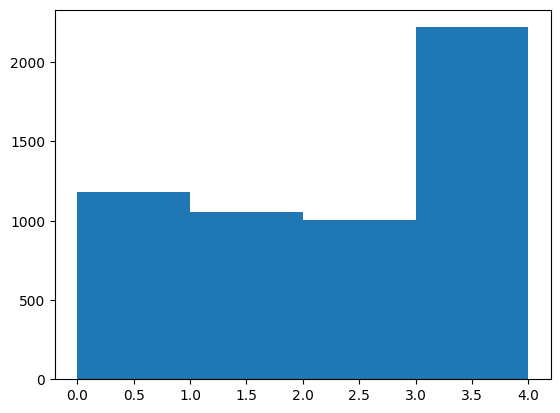

In [2]:
beesDB = pd.read_csv('./level_1/training_data.csv', header = None)
npBest = beesDB.values
# pandas to np array

plt.hist(npBest[:,1], bins=[0,1,2,3,4])

In [5]:
# Filter pandas where first column doesn't have 30 characters
beesFiltered = beesDB[beesDB.iloc[:,0].str.len() == 30]
beesFiltered.head()
beesFiltered.shape
# plt.hist(beesFiltered.iloc[:,1], bins=[0,1,2,3,4,5])
# beesDB.shape

(5275, 2)

In [9]:
# Neural network to classify bees with sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



In [10]:
def convertStringToNpIntArray(string):
    return np.array([ord(x) - ord('a') for x in string])

In [79]:
beesEncoded = beesFiltered.iloc[:,0].apply(convertStringToNpIntArray)
# beesEncoded = beesFiltered.iloc[:,0]
# beesEncoded.insert(0, '1', beesFiltered.iloc[:,1])
beesEncoded = beesEncoded.to_frame()
beesEncoded.insert(1, '1', beesFiltered.iloc[:,1])

X_train = np.stack(beesEncoded.iloc[:,0].values)
y_train = np.stack(beesEncoded.iloc[:,1].values)

In [50]:
# Training the neural network with 5 output neurons using scikit-learn
mlp = MLPClassifier(alpha = 5e-4,hidden_layer_sizes=(50,50,50,50,50,50), max_iter=50000)
mlp.fit(X_train,y_train)


MLPClassifier(alpha=0.0005, hidden_layer_sizes=(50, 50, 50, 50, 50, 50),
              max_iter=50000)

In [39]:
def loadTest(path: str):
    testData = pd.read_csv(path, header = None)
    testData = testData.iloc[:,0].apply(convertStringToNpIntArray)
    testData = np.stack(testData.values)
    return testData
def writeResult(path: str, result):
    with open(path, 'w') as f:
        for item in result:
            f.write(str(item) + '\n')

In [92]:
testData = loadTest('./level_6/imbalanced_test_data.csv')


In [2]:
import keras
import tensorflow as tf

2022-11-11 19:59:19.412792: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-11 19:59:23.517085: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-11 19:59:23.517147: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-11 19:59:23.868038: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-11 19:59:34.488563: W tensorflow/stream_executor/platform/de

In [85]:
# Training the neural network with 5 output neurons using keras
model = keras.Sequential([
    keras.layers.Dense(50, activation=tf.nn.relu),
    keras.layers.Dense(50, activation=tf.nn.relu),
    keras.layers.Dense(50, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(50, activation=tf.nn.relu),
    keras.layers.Dense(50, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(50, activation=tf.nn.relu),
    keras.layers.Dense(5, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100)    


Epoch 1/100
165/165 [==============================] - 1s 2ms/step - loss: 1.6209 - accuracy: 0.2123
Epoch 2/100
165/165 [==============================] - 0s 2ms/step - loss: 1.6044 - accuracy: 0.2298
Epoch 3/100
165/165 [==============================] - 0s 2ms/step - loss: 1.6033 - accuracy: 0.2375
Epoch 4/100
165/165 [==============================] - 0s 2ms/step - loss: 1.5954 - accuracy: 0.2529
Epoch 5/100
165/165 [==============================] - 0s 2ms/step - loss: 1.5843 - accuracy: 0.2713
Epoch 6/100
165/165 [==============================] - 0s 2ms/step - loss: 1.5716 - accuracy: 0.2842
Epoch 7/100
165/165 [==============================] - 0s 2ms/step - loss: 1.5573 - accuracy: 0.2891
Epoch 8/100
165/165 [==============================] - 0s 2ms/step - loss: 1.5385 - accuracy: 0.3014
Epoch 9/100
165/165 [==============================] - 0s 2ms/step - loss: 1.5284 - accuracy: 0.3065
Epoch 10/100
165/165 [==============================] - 0s 2ms/step - loss: 1.5027 - accura

In [86]:
# model.evaluate(X_train, y_train)
beesAns4 = model.predict(testData)
beesAns4 = np.argmax(beesAns4, axis=1)
beesAns4
writeResult('beesAns4', beesAns4)

31/31 [==============================] - 0s 1ms/step


- 1: lstm 30, 2 de 50 dense, dropout 0.2, 2 dense 50, dense 5 output cu softmax - 96% fscore
- 2: lstm 50, 2 de 50 dense, dropout 0.3, la fel - 94% fscore
- 3: lstm 50, 2 de 50 dense, dropout 0.2, la fel - 93% fscore
- 4: lstm 30, 2 de 50 dense, dropout 0.2, 1 dens 50, output - 86% -> nu trebuie complexitate scazuta
- 5: lstm 30, 2 de 50 dense, dropout 0.2, 3 dense 50, output - probabil mai jos, deci nu extra dense layer
- 6: lstm 30, 2 de 50 dense, dropout 0.15, 2 dense 50, output - probabil, mai jos, nu dropout mai mare
- 7: lstm 30, 2 dense de 50, dropout 0.2, 2 dense de 50, dense 5 output cu softmax - (=1 config) 
- 8: 2 lstm 30, 2 dense de 50, dropout 0.2, 2 dense de 50, dense 5 output cu softmax - 97% - deci ne trebuie complexitate si mai mare
- 9: 3 lstm 30, 2 dense de 50, dropout 0.2, 1 dense de 50, dense 5 output cu softmax - cu speranta

In [3]:
# LSTM using keras
model = keras.Sequential([
    keras.layers.LSTM(30, input_shape=(30,1), return_sequences=True),
    keras.layers.LSTM(30, input_shape=(30,1), return_sequences=True),
    keras.layers.LSTM(30, input_shape=(30,1), return_sequences=True),
    keras.layers.LSTM(30, input_shape=(30,1)),
    
    
    keras.layers.Dense(50, activation=tf.nn.relu),
    
    keras.layers.Dense(5, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20)


2022-11-11 19:59:57.573330: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (100)
2022-11-11 19:59:57.573403: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Laptop): /proc/driver/nvidia/version does not exist
2022-11-11 19:59:57.578244: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


NameError: name 'X_train' is not defined

In [122]:
beesAns4 = model.predict(testData)
beesAns4 = np.argmax(beesAns4, axis=1)
beesAns4
writeResult('beesAns4', beesAns4)

42/42 [==============================] - 2s 12ms/step


In [51]:
beesAns4 = mlp.predict(testData)
print(beesAns4)
writeResult('beesAns4', beesAns4)

[1 1 0 2 3 0 0 4 1 0 2 2 0 2 1 1 1 1 3 0 2 1 4 3 1 4 4 3 1 3 0 1 4 3 0 0 2
 1 4 4 0 2 0 4 2 4 0 0 1 0 2 2 0 0 1 3 2 3 4 0 2 4 1 0 1 2 4 0 4 2 3 1 2 2
 2 4 4 4 1 1 1 0 3 4 0 1 2 3 0 1 2 4 3 3 1 4 0 4 0 4 1 0 4 4 1 2 0 3 1 2 2
 4 3 1 4 0 4 4 3 1 3 0 2 4 3 0 0 3 1 2 0 1 1 1 2 3 3 4 0 1 2 3 2 2 2 2 2 4
 3 1 0 3 1 3 3 4 0 0 1 2 1 2 0 1 0 3 1 0 1 1 1 1 4 4 3 4 1 1 2 3 1 1 4 3 1
 2 2 4 4 1 2 0 0 3 0 1 0 0 0 1 0 2 0 0 2 4 0 4 1 1 2 2 4 1 3 0 3 1 1 2 0 1
 3 4 0 1 4 4 2 4 4 0 0 4 2 3 4 1 0 3 1 0 3 1 4 1 0 4 1 2 4 2 0 2 1 2 2 2 3
 3 2 1 0 0 2 1 4 3 3 2 2 4 1 1 3 0 2 3 1 1 3 4 0 1 2 3 0 0 1 1 2 2 3 1 4 0
 2 0 0 3 3 0 3 1 0 1 0 4 3 0 3 1 2 1 3 1 0 2 4 0 1 1 4 0 4 0 2 0 2 3 1 4 3
 3 3 2 3 4 0 4 2 2 0 3 2 1 4 3 2 3 0 1 0 3 1 3 1 4 1 2 4 3 2 4 1 4 4 4 2 4
 4 0 3 0 2 1 2 1 4 4 1 3 3 0 4 0 0 2 2 0 1 1 0 4 3 2 2 4 2 4 0 3 1 4 4 3 4
 3 2 4 1 3 3 4 4 2 0 2 1 1 2 1 0 3 0 2 4 4 0 2 4 1 1 2 3 4 2 2 1 2 2 1 3 2
 0 2 3 2 3 0 2 0 4 4 2 3 1 0 0 0 1 0 4 1 3 1 0 4 1 3 3 1 0 1 2 0 2 4 4 3 0
 4 4 2 4 0 0 0 4 2 0 1 3 